[활성화 함수] https://reniew.github.io/12/

In [10]:
from IPython.display import Image

for i in range(1, 10):
    display(Image(f'/content/drive/MyDrive/cakd5_colab/m9_딥러닝알고리즘구현/datasets/rnn{i}.jpg'))

Output hidden; open in https://colab.research.google.com to view.

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,SimpleRNN

model = Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


네트워크의 표현력을 증가시키기 위해 여러개의 순환 층을 쌓는것이 유용하다.
이런 설정에는 중간 층들이 전체 출력 시퀀스를 반환하도록 설정 한다.

In [14]:
model = Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32,return_sequences=True))
model.add(SimpleRNN(32,return_sequences=True))
model.add(SimpleRNN(32,return_sequences=True))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 32)                2080      
                                                                 
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 10000 
maxlen = 500  
ch_size = 32

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), '훈련 시퀀스')
print(len(input_test), '테스트 시퀀스')

input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train 크기:', input_train.shape)
print('input_test 크기:', input_test.shape)

17473536/17464789 [==============================] - 0s 0us/step
25000 훈련 시퀀스
25000 테스트 시퀀스
input_train 크기: (25000, 500)
input_test 크기: (25000, 500)


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,SimpleRNN,Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 27s 164ms/step - loss: 0.5604 - acc: 0.7067 - val_loss: 0.5092 - val_acc: 0.7512
Epoch 2/10
157/157 [==============================] - 35s 222ms/step - loss: 0.3477 - acc: 0.8601 - val_loss: 0.3900 - val_acc: 0.8326
Epoch 3/10
157/157 [==============================] - 40s 254ms/step - loss: 0.2754 - acc: 0.8948 - val_loss: 0.3858 - val_acc: 0.8302
Epoch 4/10
157/157 [==============================] - 25s 162ms/step - loss: 0.2259 - acc: 0.9153 - val_loss: 0.4500 - val_acc: 0.7748
Epoch 5/10
157/157 [==============================] - 25s 162ms/step - loss: 0.1851 - acc: 0.9319 - val_loss: 0.3788 - val_acc: 0.8468
Epoch 6/10
157/157 [==============================] - 25s 161ms/step - loss: 0.1474 - acc: 0.9478 - val_loss: 0.3831 - val_acc: 0.8670
Epoch 7/10
157/157 [==============================] - 26s 167ms/step - loss: 0.1164 - acc: 0.9591 - val_loss: 0.3854 - val_acc: 0.8634
Epoch 8/10
157/157 [==============================] - 2

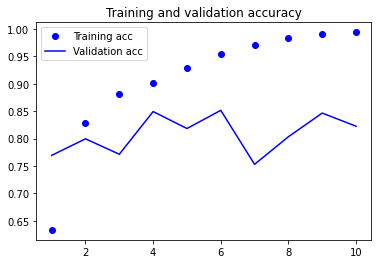

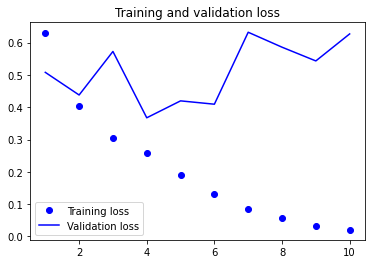

In [4]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [11]:
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 63s 386ms/step - loss: 0.5141 - acc: 0.7589 - val_loss: 0.3504 - val_acc: 0.8522
Epoch 2/10
157/157 [==============================] - 54s 347ms/step - loss: 0.2981 - acc: 0.8845 - val_loss: 0.2984 - val_acc: 0.8748
Epoch 3/10
157/157 [==============================] - 55s 349ms/step - loss: 0.2487 - acc: 0.9093 - val_loss: 0.3622 - val_acc: 0.8700
Epoch 4/10
157/157 [==============================] - 54s 344ms/step - loss: 0.2048 - acc: 0.9252 - val_loss: 0.3132 - val_acc: 0.8640
Epoch 5/10
157/157 [==============================] - 54s 346ms/step - loss: 0.1798 - acc: 0.9363 - val_loss: 0.3049 - val_acc: 0.8904
Epoch 6/10
157/157 [==============================] - 55s 348ms/step - loss: 0.1649 - acc: 0.9424 - val_loss: 0.3241 - val_acc: 0.8778
Epoch 7/10
157/157 [==============================] - 54s 345ms/step - loss: 0.1479 - acc: 0.9473 - val_loss: 0.3892 - val_acc: 0.8468
Epoch 8/10
157/157 [==============================] - 5

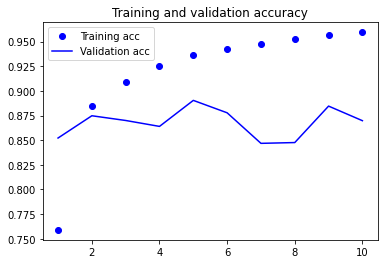

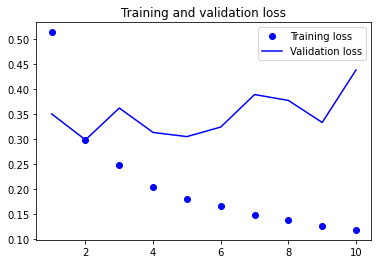

In [12]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [13]:
from tensorflow.keras.layers import GRU

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(GRU(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 54s 329ms/step - loss: 0.5317 - acc: 0.7172 - val_loss: 0.4596 - val_acc: 0.7814
Epoch 2/10
157/157 [==============================] - 51s 328ms/step - loss: 0.3074 - acc: 0.8741 - val_loss: 0.4863 - val_acc: 0.8330
Epoch 3/10
157/157 [==============================] - 52s 328ms/step - loss: 0.2521 - acc: 0.9012 - val_loss: 0.3744 - val_acc: 0.8444
Epoch 4/10
157/157 [==============================] - 51s 328ms/step - loss: 0.2160 - acc: 0.9184 - val_loss: 0.3196 - val_acc: 0.8746
Epoch 5/10
157/157 [==============================] - 51s 327ms/step - loss: 0.1920 - acc: 0.9281 - val_loss: 0.4150 - val_acc: 0.8728
Epoch 6/10
157/157 [==============================] - 51s 327ms/step - loss: 0.1720 - acc: 0.9369 - val_loss: 0.3922 - val_acc: 0.8710
Epoch 7/10
157/157 [==============================] - 51s 326ms/step - loss: 0.1580 - acc: 0.9427 - val_loss: 0.3488 - val_acc: 0.8850
Epoch 8/10
157/157 [==============================] - 5

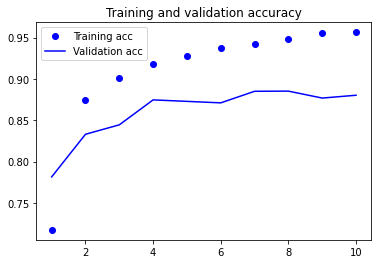

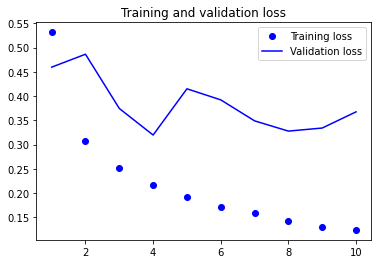

In [14]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()